## student 1: Ying LAI, student 2: Yingjie LIU

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Linear Classification with gradient descent



### Exercise 1

The objective of this exercise is to build a simple linear classifier on a linearly separable problem. To this end we propose a toy dataset generated according to two gaussian (one class by gaussian).

In [2]:
np.random.seed(42)
dataset = list(zip(np.random.randn(50,2)*0.2 + [0.5, -0.5], np.ones(50))) \
               + list(zip(np.random.randn(50,2)*0.4 + [-0.5, 0.5], np.zeros(50)))
X, Y = np.array([x for (x, _) in dataset]), np.array([y for (_, y) in dataset]) 

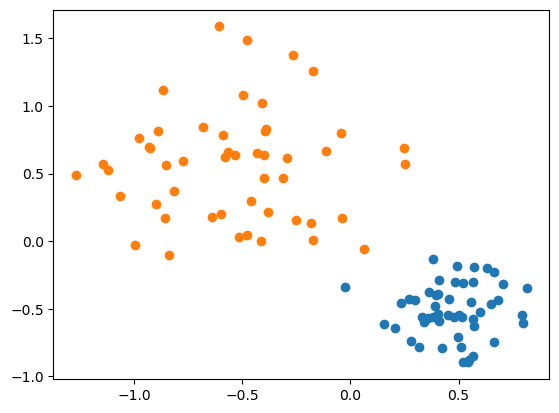

In [3]:
plt.scatter(X[Y==1][:, 0],X[Y==1][:, 1])
plt.scatter(X[Y==0][:, 0],X[Y==0][:, 1])

## 1. Linear Function and loss 
**Question 1**:Create a function `affine` taking as parameters $w$ (2 dim vector), $b$ (scalars) and $x$ (2 dim vector) that return $$w^{\intercal}x  + b$$ 


In [4]:
def affine(w, b, x):
    return np.dot(w, x) + b
    raise NotImplementedError('Implement the function')

**Question 2:** Compute the equation of the line  such that $w^{\intercal}x  + b = 0$ and then draw it for $w_1 = 1$, $w_2 = 2$ and $b=1$. The function should return parameters $c$ and $d$ of $y = cx + d$

-0.5 -0.5


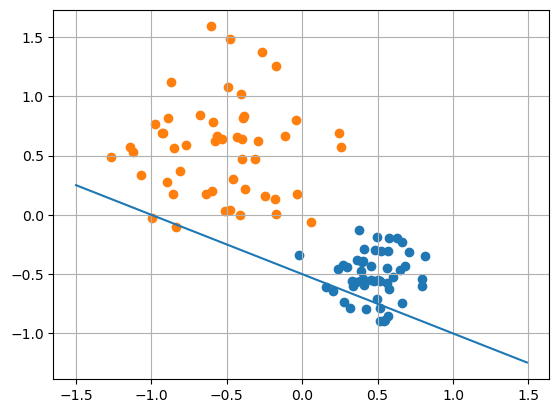

In [5]:
def line_param(w, b):
    d = -b / w[1]
    c = -w[0]/w[1]
    return c, d
    raise NotImplementedError('Implement the function')
c, d = line_param([1, 2], 1)
print(d, c)
plt.scatter(X[Y==1][:, 0],X[Y==1][:, 1])
plt.scatter(X[Y==0][:, 0],X[Y==0][:, 1])
plt.grid()
rrange = np.arange(-1.5, 1.5, 0.01)
plt.plot(rrange, rrange * c + d)
plt.show()

**Question 3**: Create a function `affine_grad` taking as parameters $w$ (2 dim vector), $b$ (scalars) and $x$ (2 dim vector) returning the gradient w.r.t $w$ and $b$ : $$(\nabla_{w}w^{\intercal}x  + b,\nabla_{b}w^{\intercal}x  + b) $$ 

In [6]:
def affine_grad(w, b, x):
    grad_w =   x  # Gradient w.r.t. w is x
    grad_b = 1  # Gradient w.r.t. b is 1
    return (grad_w, grad_b)
    raise NotImplementedError('Implement the function')

## Hinge loss: forward and gradient
Create two functions that compute respectivelly the Hinge Loss and its derivative (in x) .

$$\text{Hinge loss} = \max(0, 1 - y \times x)$$

!!! This is the formula of the hinge loss if $y\in \{-1,1\}$

In [7]:
def hinge_loss(x, y):
    return np.maximum(0, 1 - y * x)
    raise NotImplementedError('Implement the function')

def hinge_loss_grad(x, y):
    condition = 1 - y * x
    return np.where(condition > 0, -y, 0)
    raise NotImplementedError('Implement the function')

## 2. Gradient descent


Consider the function $f_{w, b}$ such that $f_{w, b}(x) = \max(0, 1 - y \times (w^{\intercal}x  + b))$. We want to train such function using SGD on parameters (w,b). 

**Question 1**: Complete the training loop below:


The loss for the epoch 0 is 0.9767277143281154


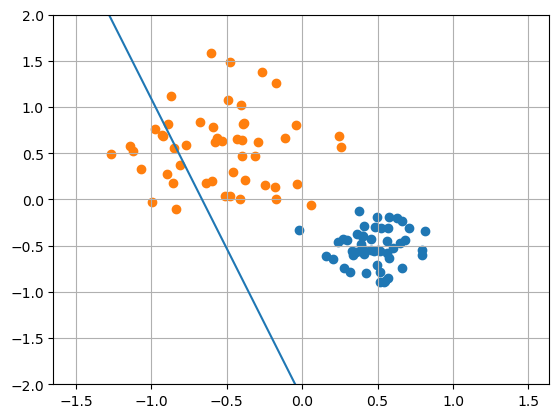

The loss for the epoch 1 is 0.9225269439658335


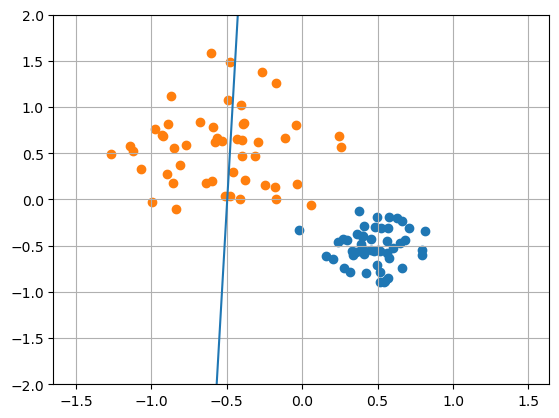

The loss for the epoch 2 is 0.8683261736035516


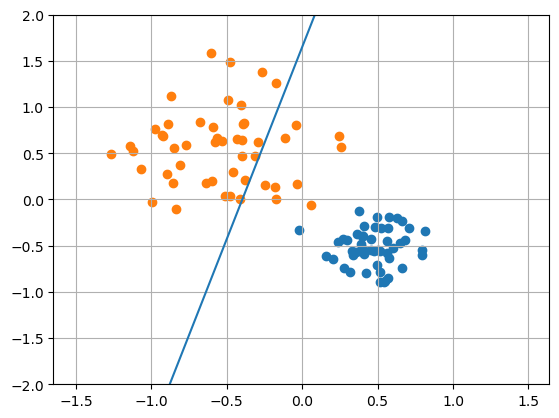

The loss for the epoch 3 is 0.8141254032412694


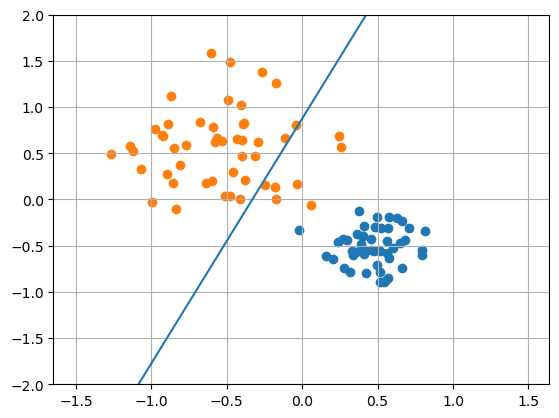

The loss for the epoch 4 is 0.7599246328789871


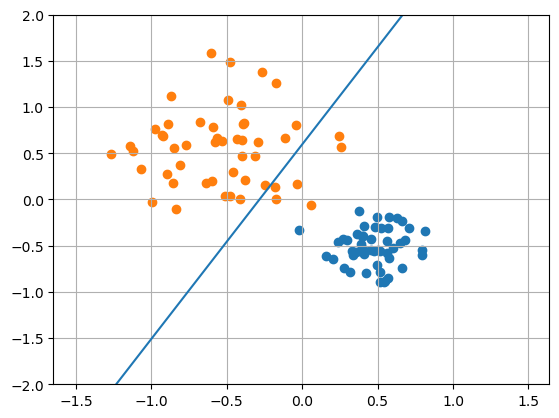

The loss for the epoch 5 is 0.7057238625167049


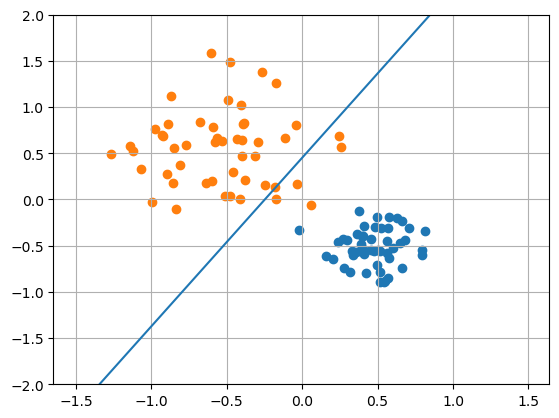

The loss for the epoch 6 is 0.6515230921544227


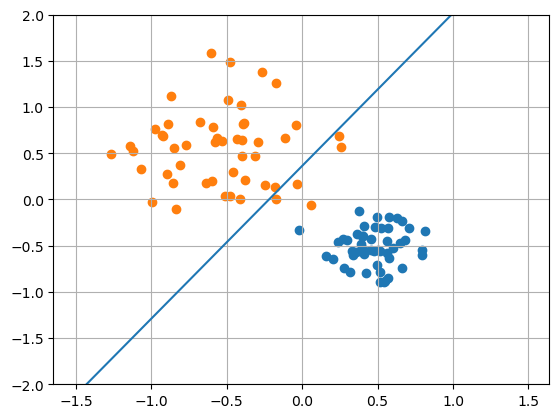

The loss for the epoch 7 is 0.5973223217921405


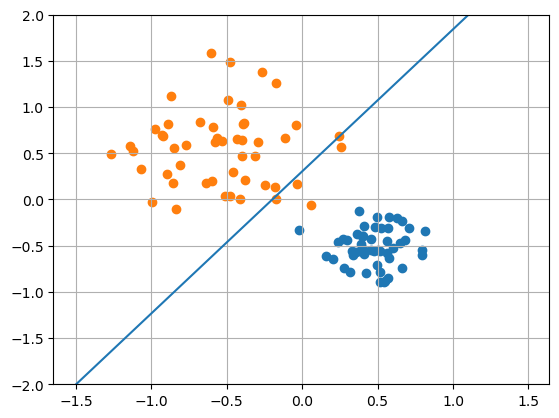

The loss for the epoch 8 is 0.5431215514298584


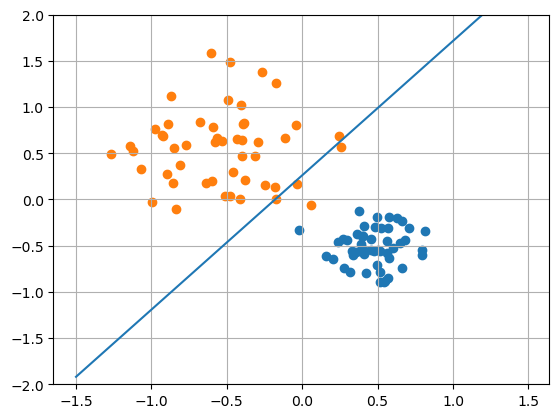

The loss for the epoch 9 is 0.48892078106757636


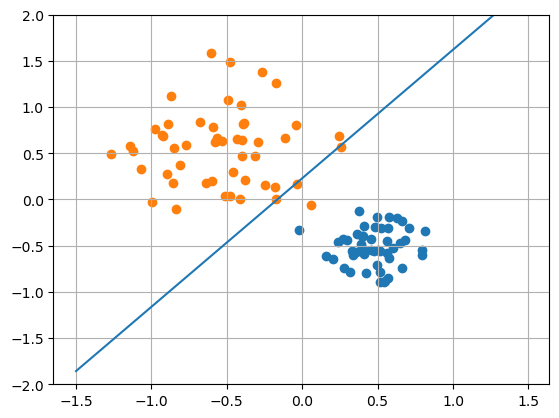

The loss for the epoch 10 is 0.4354174877478578


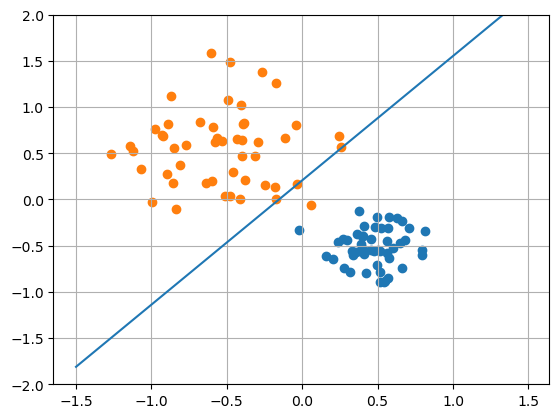

The loss for the epoch 11 is 0.38459917046278647


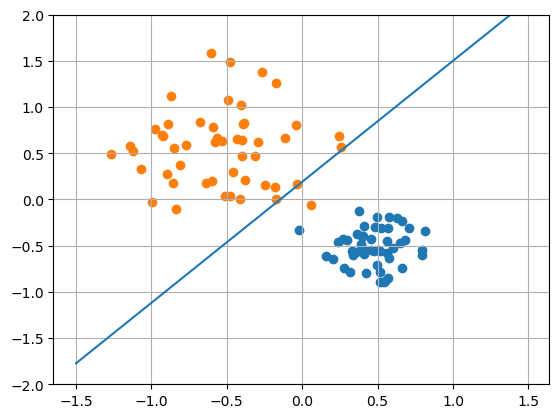

The loss for the epoch 12 is 0.33973025598270445


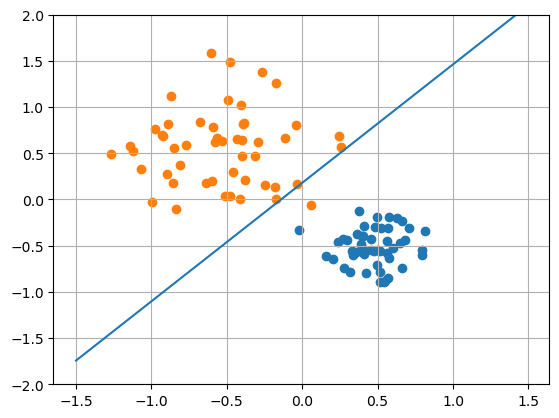

The loss for the epoch 13 is 0.30773691940018905


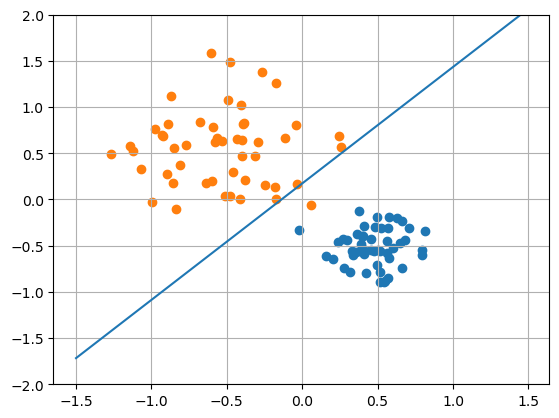

The loss for the epoch 14 is 0.2790205879082048


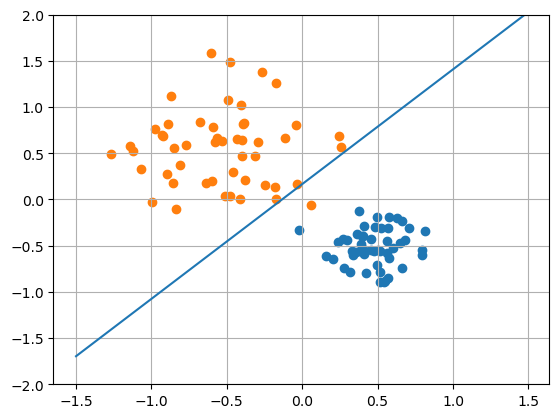

The loss for the epoch 15 is 0.2541271234157441


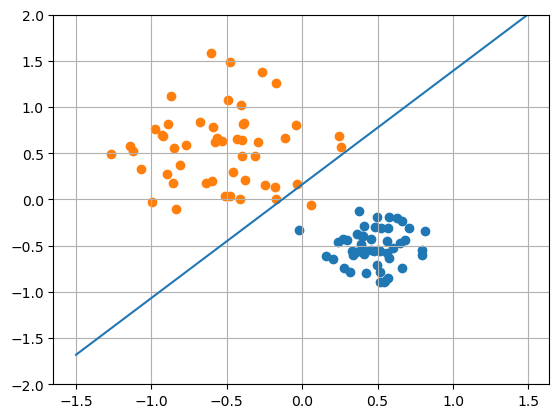

The loss for the epoch 16 is 0.23495701501717764


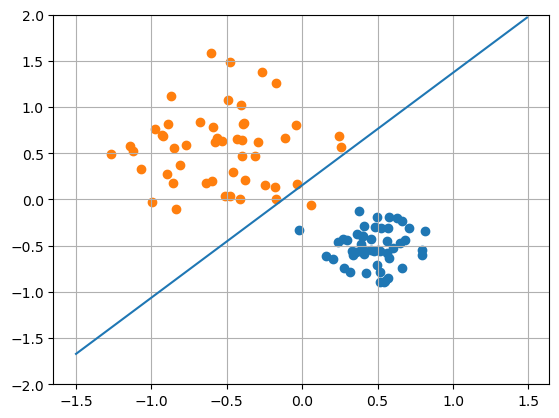

The loss for the epoch 17 is 0.21865897038107962


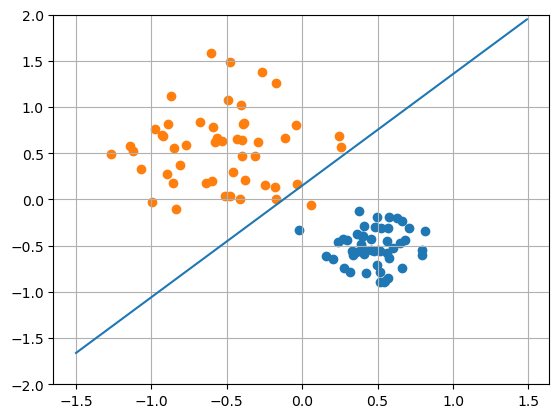

The loss for the epoch 18 is 0.20432557624582487


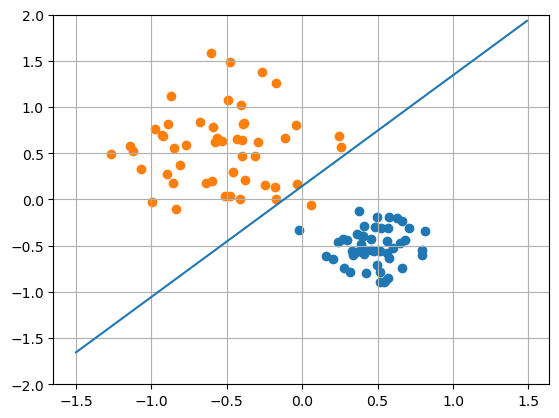

The loss for the epoch 19 is 0.19240455973038845


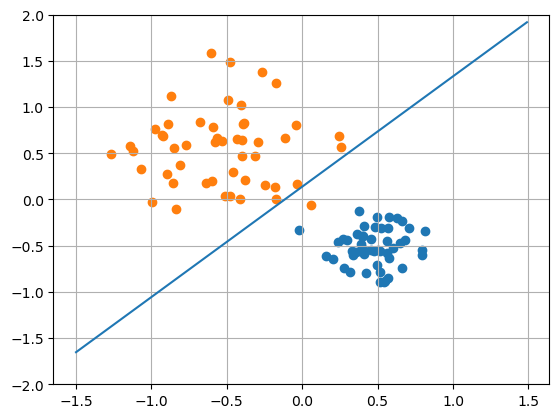

In [10]:
n_epoch = 20
w = [0.1, 0.1]
b = 0.1
learning_rate = 1e-3

for epoch in range(n_epoch):
    loss_values = []
    shuffled_index = np.arange(len(X))
    np.random.shuffle(shuffled_index)
    
    for i in shuffled_index:
        x, y = x, y = X[i], 2 * Y[i] - 1  # Convert labels from {0, 1} to {-1, 1}
        # raise NotImplementedError('Implement the function')
        o_pred = affine(w, b, x)
        loss = hinge_loss(o_pred, y)
        
        loss_values.append(loss)
        
        grad = hinge_loss_grad(o_pred, y)
        w_grad = x * grad
        b_grad = grad

        # update w and b according to the gradients
        if loss>0:
            w -= learning_rate * w_grad
            b -= learning_rate * b_grad
    print(f'The loss for the epoch {epoch} is {np.mean(loss_values)}')
    loss_values = []

    c, d = line_param(w, b)
    
    plt.scatter(X[Y==1][:, 0],X[Y==1][:, 1])
    plt.scatter(X[Y==0][:, 0],X[Y==0][:, 1])
    plt.grid()
    rrange = np.arange(-1.5, 1.5, 0.01)
    plt.plot(rrange, rrange * c + d)
    plt.ylim([-2, 2])
    
    plt.show()

**Question 2** Compute the final accuracy (number of correct classification on number of data points)

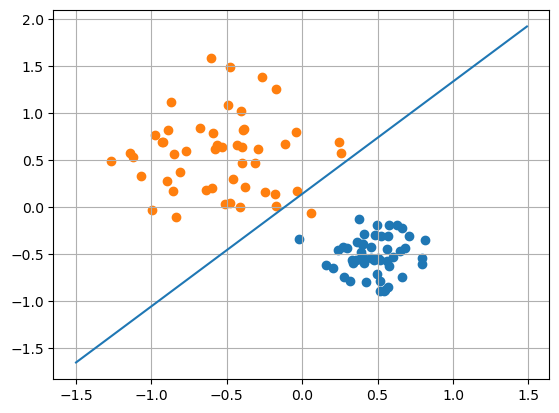

Accuracy: 0.99


In [11]:
c, d = line_param(w, b)     


plt.scatter(X[Y==1][:, 0],X[Y==1][:, 1])
plt.scatter(X[Y==0][:, 0],X[Y==0][:, 1])

plt.grid()

rrange = np.arange(-1.5, 1.5, 0.01)
plt.plot(rrange, rrange * c + d)
plt.show()

def predict(w, b, x):
    return 1 if affine(w, b, x) > 0 else 0
    raise NotImplementedError('Implement the function')


correct = 0
for x, y in dataset:
    correct += predict(w, b, x) == y

print(f'Accuracy: {correct/len(dataset)}')


**Question 3** With minimal changes (hyper-parameters) can you improve accuracy? If yes, apply those changes.

The last loss for epoch 9 is 0.0036973669573318046
Final Accuracy: 0.5000


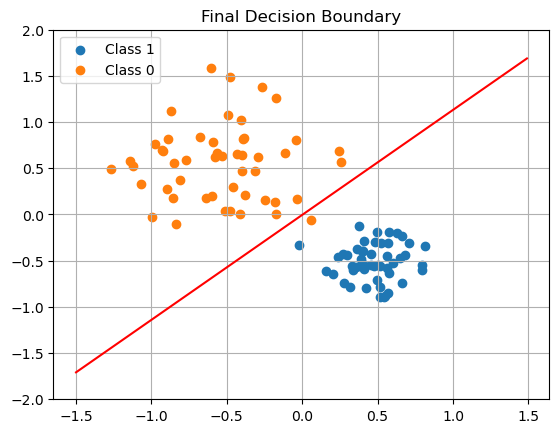

In [14]:


# change epoch and learning rate
n_epoch = 10
w = np.array([0.1, 0.1])  
b = 0.1
learning_rate = 5e-3  # Adjust learning rate

# Training loop
for epoch in range(n_epoch):
    loss_values = []
    shuffled_indices = np.arange(len(X))
    np.random.shuffle(shuffled_indices)

    for i in shuffled_indices:
        x, y = X[i], 2 * Y[i] - 1  # Convert labels from {0, 1} to {-1, 1}
        o_pred = affine(w, b, x)
        loss = hinge_loss(o_pred, y)
        loss_values.append(loss)

        # Compute gradients
        grad_sign = hinge_loss_grad(o_pred, y)
        w_grad = grad_sign * x
        b_grad = grad_sign
        
        # Update parameters only if the loss is positive
        if np.any(loss > 0):
            w -= learning_rate * w_grad
            b -= learning_rate * b_grad

last_loss = loss_values[-1]
print(f'The last loss for epoch {epoch} is {last_loss}')

# After training, compute the final accuracy
def predict(w, b, x):
    return 1 if affine(w, b, x) > 0 else 0

correct = sum(predict(w, b, x) == y for x, y in zip(X, 2*Y-1))  # Convert Y from {0, 1} to {-1, 1}
accuracy = correct / len(X)
print(f'Final Accuracy: {accuracy:.4f}')

# Plot the final decision boundary and data points
c, d = line_param(w, b)
plt.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], label='Class 1')
plt.scatter(X[Y == 0][:, 0], X[Y == 0][:, 1], label='Class 0')
plt.grid()
plt.legend()
rrange = np.arange(-1.5, 1.5, 0.01)
plt.plot(rrange, rrange * c + d, 'r-')
plt.ylim([-2, 2])
plt.title(f'Final Decision Boundary')
plt.show()


## 3. Non linearly separable problem

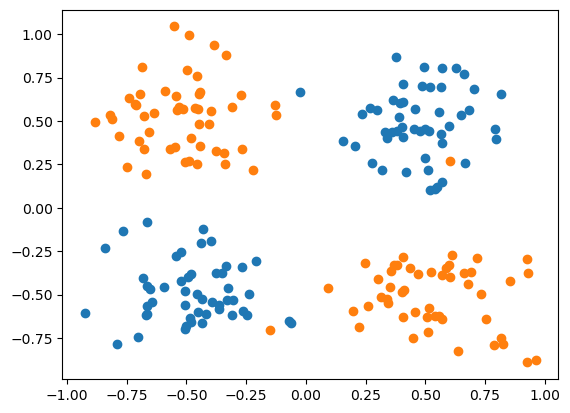

In [15]:
np.random.seed(42)
dataset = list(zip(np.random.randn(50,2)*0.2 + [0.5, 0.5], np.ones(50))) \
               + list(zip(np.random.randn(50,2)*0.2 + [-0.5, 0.5], np.zeros(50)))\
               + list(zip(np.random.randn(50,2)*0.2 + [0.5, -0.5], np.zeros(50))) \
               +  list(zip(np.random.randn(50,2)*0.2 + [-0.5, -0.5], np.ones(50)))
X, Y = np.array([x for (x, _) in dataset]), np.array([y for (_, y) in dataset]) 

plt.scatter(X[Y==1][:, 0],X[Y==1][:, 1])
plt.scatter(X[Y==0][:, 0],X[Y==0][:, 1])

**Question 1**: Train a linear classifier on this dataset and reports the results. Without manually transform the data explain what architecture could solve this problem

In [16]:
# Use SVM to separate the two classes
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


# Initialize the SVM model
svm_model = SVC(kernel='linear')

# Train the SVM model on the training data
svm_model.fit(X_train, Y_train)

# Predict on the test data
Y_pred_svm = svm_model.predict(X_test)

# Calculate accuracy
accuracy_svm = accuracy_score(Y_test, Y_pred_svm)
print("SVM Accuracy:", accuracy_svm)



SVM Accuracy: 0.575


In [17]:
# Or NN
class NeuralNetwork:
    def __init__(self, input_dim, hidden_dim):
        self.w1 = np.random.randn(input_dim, hidden_dim)
        self.b1 = np.zeros(hidden_dim)
        self.w2 = np.random.randn(hidden_dim, 1)
        self.b2 = np.zeros(1)

    def relu(self, z):
        return np.maximum(0, z)

    def d_relu(self, x):
        return (x > 0).astype(float)

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def forward(self, X):
        self.z1 = np.dot(X, self.w1) + self.b1
        self.a1 = self.relu(self.z1)
        self.z2 = np.dot(self.a1, self.w2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2

    def backward(self, X, y, output):
        self.dz2 = output - y
        self.dw2 = np.dot(self.a1.T, self.dz2)
        self.db2 = np.sum(self.dz2, axis=0)
        self.da1 = np.dot(self.dz2, self.w2.T)
        self.dz1 = self.da1 * self.d_relu(self.z1)
        self.dw1 = np.dot(X.T, self.dz1)
        self.db1 = np.sum(self.dz1, axis=0)

        self.w1 -= learning_rate * self.dw1
        self.b1 -= learning_rate * self.db1
        self.w2 -= learning_rate * self.dw2
        self.b2 -= learning_rate * self.db2

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the dataset into training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the neural network
nn = NeuralNetwork(input_dim=2, hidden_dim=5)

# Train the neural network
n_epochs = 1000
for epoch in range(n_epochs):
    output = nn.forward(X_train)
    nn.backward(X_train, Y_train.reshape(-1, 1), output)

# Test the neural network
Y_pred = nn.forward(X_test)
Y_pred = (Y_pred > 0.5).astype(int)

# Compute the accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f'The accuracy of the neural network is {accuracy * 100}%')

The accuracy of the neural network is 97.5%
